# <center> ARIMA model to forecast NIO Stock <center>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import math
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import datetime
from pandas_datareader import data, wb

plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10

In [11]:
start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2020-10-31')
df = data.DataReader('NIO', 'yahoo', start, end)

In [8]:
price = df['Close']
price

Date
2018-09-12     6.600000
2018-09-13    11.600000
2018-09-14     9.900000
2018-09-17     8.500000
2018-09-18     7.680000
                ...    
2020-10-26    26.010000
2020-10-27    28.440001
2020-10-28    27.510000
2020-10-29    31.990000
2020-10-30    30.580000
Name: Close, Length: 539, dtype: float64

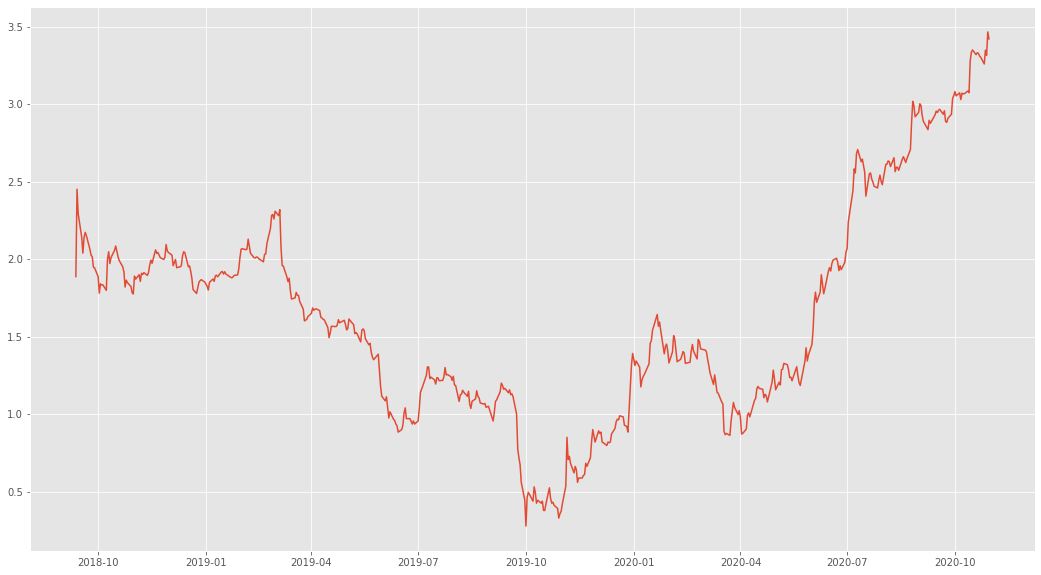

In [24]:
lnprice = np.log(price)
lnprice
plt.plot(lnprice)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


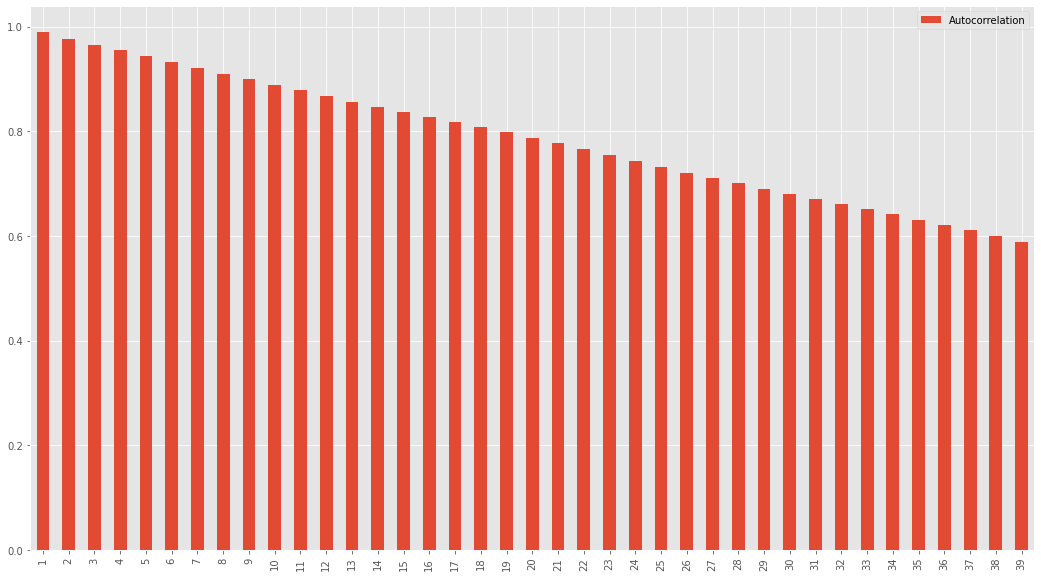

In [20]:
acf_1 = acf(lnprice)[1:40]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

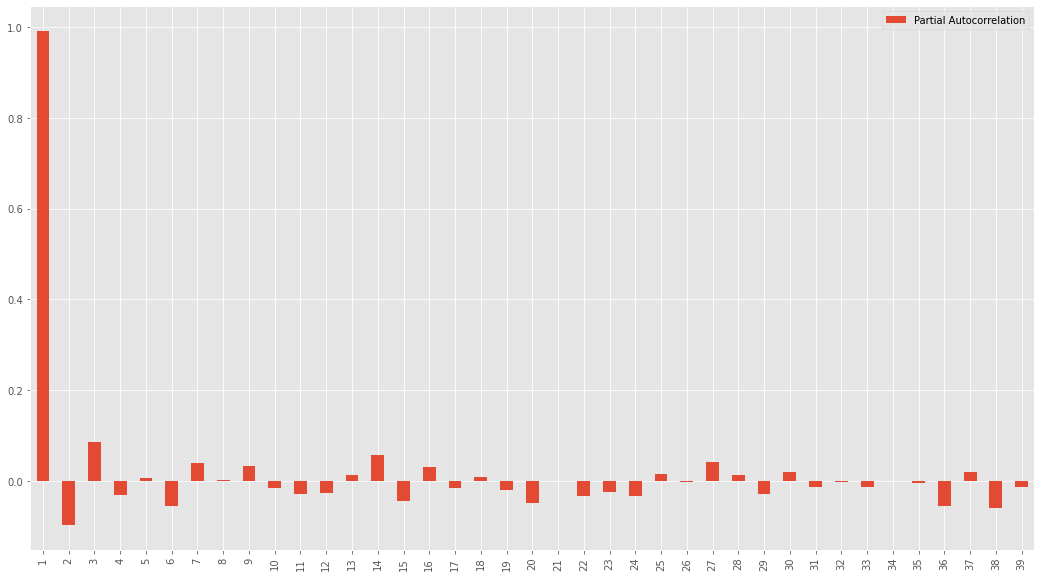

In [21]:
pacf_1 = pacf(lnprice)[1:40]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


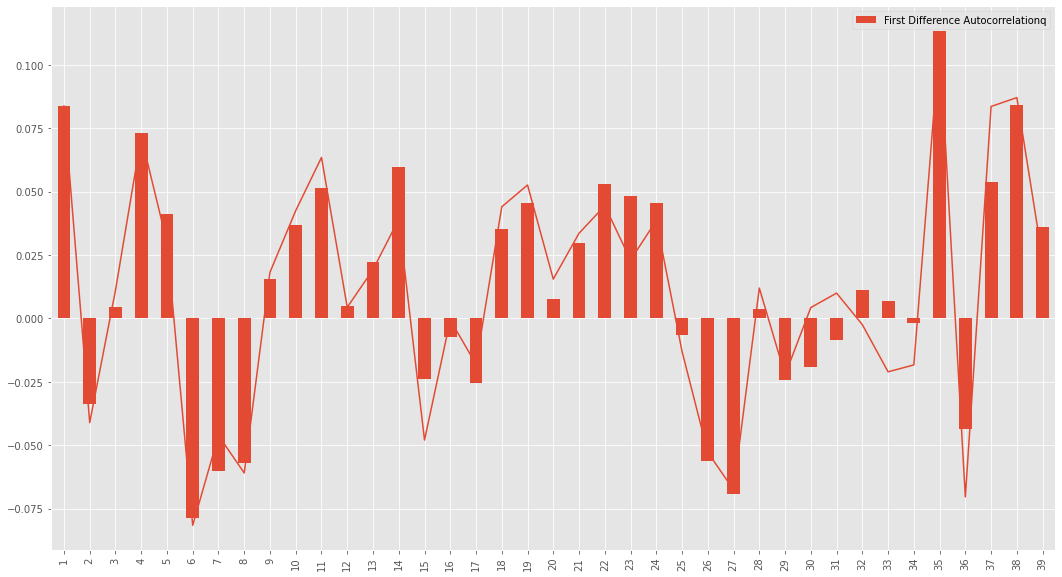

In [23]:
result = ts.adfuller(lnprice, 1)
result
lnprice_diff = lnprice - lnprice.shift()
diff = lnprice_diff.dropna()
acf_1_diff = acf(diff)[1:40]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelationq']
test_df.index += 1
test_df.plot(kind = 'bar')
pacf_1_diff = pacf(diff)[1:40]
plt.plot(pacf_1_diff)
plt.show()

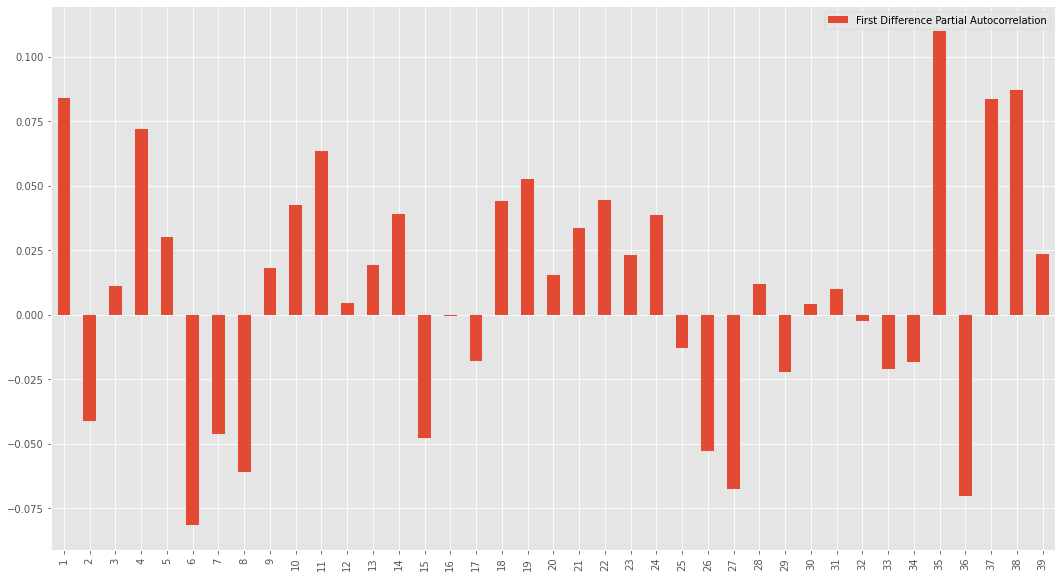

In [25]:
test_df = pd.DataFrame([pacf_1_diff]).T
test_df.columns = ['First Difference Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind = 'bar')
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  538
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 691.109
Method:                           css   S.D. of innovations              0.067
Date:                Tue, 10 Nov 2020   AIC                          -1378.218
Time:                        23:08:04   BIC                          -1369.643
Sample:                             1   HQIC                         -1374.864
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.003      0.987      0.324      -0.003       0.009


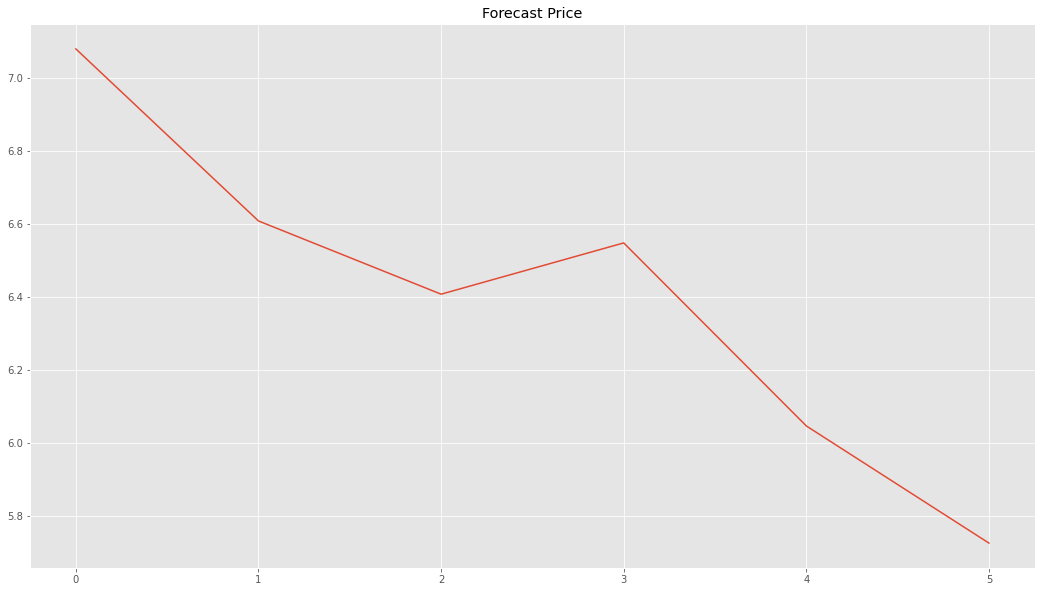

In [31]:
price_matrix = lnprice.to_numpy()
model = ARIMA(price_matrix, order = (0, 1, 0))
model_fit = model.fit(disp = 0)
print(model_fit.summary())
predictions = model_fit.predict(122, 127, typ = 'levels')
predictions
predictionsadjusted = np.exp(predictions)
plt.plot(predictionsadjusted)
plt.title('Forecast Price')
plt.show()